In [1]:
using Plots, LaTeXStrings
using Plots.PlotMeasures
empty!(ARGS)
push!(ARGS, "G:/Hamburg/b20.0_mu0.4/lDGAConfig.toml")
include(joinpath(@__DIR__,"../examples/example00_lDGA.jl"))

using LaTeXStrings

  Activating project at `G:\Codes\LadderDGA.jl`
[ Info: Precompiling LadderDGA [78e40beb-bf89-4c0e-9d2b-bee278912f2b] (cache misses: include_dependency fsize change (20))


[ Info: Reading Inputs...
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.05-0.025 of size 20


DBG: NOT using diagonal terms in λ₀


┌ Info: Inputs Read. Starting Computation.
│     Local susceptibilities with ranges are:
│     χLoc_m(1:301) = 0.3838, χLoc_d(1:301) = 0.1017
│     sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.2401531297823682 ?=? 0.2427835212727256 ?≈? 0.2427835212727254 ≟ 0.24275850716113093"
│ Local EoM check for the first 5 frequencies: 0.0033, 0.0033, 0.0033, 0.0033, 0.0033  
└     
[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.002598881341 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.000987868174 ≟ 0


DBG: NOT using diagonal terms in λ₀


In [2]:
mP = lDGAhelper.mP
kG = lDGAhelper.kG
U = mP.U
nden = mP.n
beta = mP.β
lim_se = U^2 * (nden/2) * (1 - nden/2)
se_tmp = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper);

xr = collect(axes(se_tmp,2))
iν_arr = LadderDGA.iν_array(beta, xr)
gimp = lDGAhelper.gImp[1,xr];

# EPot Condition

In [174]:
λd_min_sample = -3.0# -4.42876699766992 #LadderDGA.LambdaCorrection.get_λ_min(χd)
λd_max = 10.0
Nit = 40
xr_dm_01, fr_dm_01 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_Plain)
xr_dm_02, fr_dm_02 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_Full)
xr_dm_03, fr_dm_03 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.01}, λmax=λd_max);
xr_dm_04, fr_dm_04 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.1}, λmax=λd_max);
#xr_dm_05, fr_dm_05 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=40, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.15}, λmax=λd_max);
xr_dm_06, fr_dm_06 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=40, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.5}, λmax=λd_max);
xr_dm_07, fr_dm_07 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{1.0}, λmax=λd_max);
xr_dm_08, fr_dm_08 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_EoM);

┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:307
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:307
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:307
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:307
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:307
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:307
┌ Wa

In [175]:
se_full_list = []
EP1_full_list = []
EP2_list = []
se_eom_list = []
EP1_eom_list = []
se_plain_list = []
EP1_plain_list = []
se_delta_list = []
EP1_delta_list = []
for λd in xr_dm_01  
    rhs,PP_p1 = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper, λd=λd)
    λm  = LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs, lDGAhelper)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_Full, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    Epot_2 = EPot_p2(χm, χd, λm, λd, lDGAhelper.mP.n, lDGAhelper.mP.U, lDGAhelper.kG)
    push!(se_full_list,se_tmp)
    push!(EP1_full_list,Epot_1)
    push!(EP2_list,Epot_2)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_Plain, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    push!(se_plain_list,se_tmp)
    push!(EP1_eom_list,Epot_1)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_EoM, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    push!(se_eom_list,se_tmp)
    push!(EP1_plain_list,Epot_1)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_ExpStep{0.5}, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    push!(se_delta_list,se_tmp)
    push!(EP1_delta_list,Epot_1)
end

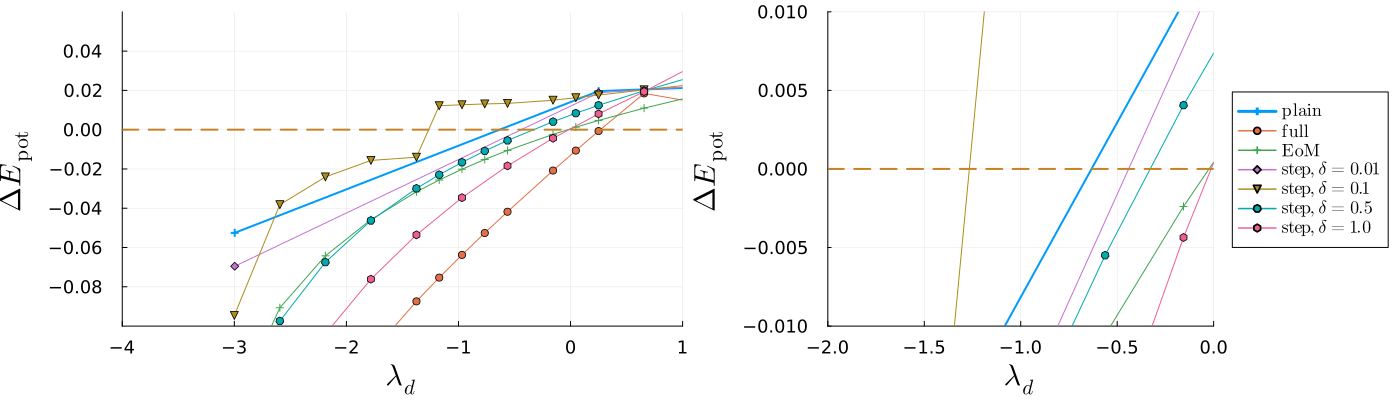

In [176]:
p1 = plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.1,.06), xlims=(-4,1), legend=nothing, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p1, xr_dm_02, fr_dm_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p1, xr_dm_08, fr_dm_08, label=L"\mathrm{EoM}", markershape=:auto)
plot!(p1, xr_dm_03, fr_dm_03, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p1, xr_dm_04, fr_dm_04, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p1, xr_dm_06, fr_dm_06, label=L"\mathrm{step}, \delta=0.5", markershape=:auto)
plot!(p1, xr_dm_07, fr_dm_07, label=L"\mathrm{step}, \delta=1.0", markershape=:auto)
hline!([0.0], label=nothing, ls=:dash, lw=2)

p2 = plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.01,.01), xlims=(-2,0), legend=:outerright, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p2, xr_dm_02, fr_dm_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p2, xr_dm_08, fr_dm_08, label=L"\mathrm{EoM}", markershape=:auto)
plot!(p2, xr_dm_03, fr_dm_03, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p2, xr_dm_04, fr_dm_04, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p2, xr_dm_06, fr_dm_06, label=L"\mathrm{step}, \delta=0.5", markershape=:auto)
plot!(p2, xr_dm_07, fr_dm_07, label=L"\mathrm{step}, \delta=1.0", markershape=:auto)
hline!([0.0], label=nothing, ls=:dash, lw=2)
p = plot(p1, p2, size=(1400,400), left_margin=8mm, bottom_margin=10mm)
savefig("delta_expstep_comparison_mu04.pdf")
display(p)

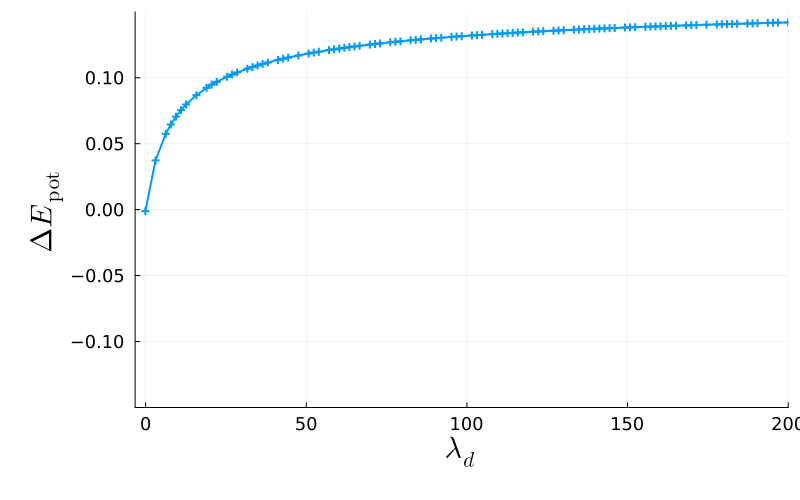

In [177]:
λd_min_sample = LadderDGA.LambdaCorrection.get_λ_min(χd)
λd_max = 200.0
Nit = 100
xr_dm_full, fr_dm_full = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_EoM);
plot(xr_dm_full, fr_dm_full,size=(800,500), linewidth=2, ylims=(-.15,.15), xlims=(λd_min_sample,λd_max), legend=nothing, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)

In [3]:
using OffsetArrays, TimerOutputs, FiniteDiff, LinearAlgebra
using ForwardDiff
using Roots
λ₀T = LadderDGA.λ₀T
eom_ν_cutoff = LadderDGA.eom_ν_cutoff
ω2_tail= LadderDGA.ω2_tail
iν_array = LadderDGA.iν_array
tail_factor = LadderDGA.tail_factor
tail_correction_term = LadderDGA.tail_correction_term
get_λ_min = LadderDGA.LambdaCorrection.get_λ_min
newton_right = LadderDGA.LambdaCorrection.newton_right
λm_rhs = LadderDGA.LambdaCorrection.λm_rhs
λm_correction_val = LadderDGA.LambdaCorrection.λm_correction_val
calc_G_Σ! = LadderDGA.calc_G_Σ!
to = LadderDGA.to
newton_secular = LadderDGA.LambdaCorrection.newton_secular


function regula_falsi(f::Function, min::Float64, max::Float64; nsteps::Int = 500, atol::Float64=1e-8, δ::Float64=1e-4, verbose::Bool=true)::Float64
    done  = false
    a::Float64 = min
    b::Float64 = max
    c::Float64 = NaN
    i     = 1
    println("tt")
    f_a::Float64 = f(a)
    f_b::Float64 = f(b)
    sign(f_a) == sign(f_b) && error("[$min,$max] is not a bracketing interval")
    println("$f_a // $f_b")
    while !done
        lambda = f_b / (f_b - f_a)

        ϵ = √eps(Float64) / 100 # some engineering to avoid short moves; still fails on some
        ϵ ≤ lambda ≤ 1 - ϵ || (lambda = 1 / 2)
        c = b - lambda * (b - a)
        c   = (f_b*a - 0.5 * f_a * b)/(f_b - 0.5*f_a)
        f_c = f(c)
        verbose && println("[$a--$c--$b] -- [$f_a--$f_b--$f_c]")
        (norm(f_c) < atol) && (done = true)
        (i >= nsteps) && (done = true)
        
        if sign(f_c)  == sign(f_b)
            m = 1 - f_c/f_b
            f_a = (m > 0 ? m : 0.5) * f_a
        else
            a   = b
            f_a = f_b
        end
        b   = c
        f_b = f_c

        i += 1
    end
    println("nsteps = ", i-1)
    return c
end

function newton_right_test2(f::Function, start::Float64, min::Float64; nsteps::Int=100, atol::Float64=1e-8, δ::Float64=1e-4, verbose::Bool=true)::Float64
    df(x) = FiniteDiff.finite_difference_derivative(f, x, typeof(Val(:forward)), Float64)
    newton_right_test(f, df, start, min; nsteps = nsteps, atol = atol, δ = δ, verbose=verbose)
end

function newton_right_test2(f::Function, df::Function, start::Float64, min::Float64; nsteps::Int = 500, atol::Float64=1e-8, δ::Float64=1e-4, verbose::Bool=true)::Float64
    done  = false
    xlast = start + δ
    xi    = xlast
    i     = 1
    while !done
        fi = f(xi)
        dfii = 1 / df(xi)
        xi = xlast - dfii * fi
        # Found solution in the correct interval
        (norm(fi) < atol) && (xi > min) && (done = true)
        # only ever search to the right! bisect instead
        if xi < min
            xi = norm(xlast - (min + δ))/2 +  (min + δ)
        else
            xlast = xi
        end
        (i >= nsteps) && (done = true)
        verbose && println("i = $i, xi = $xi, f(xi) = $fi")
        i += 1
    end
    println("nsteps = ", i-1)
    return xi
end

function λdm_correction_val_testRF(χm::χT,γm::γT,χd::χT, γd::γT,λ₀::λ₀T, h; 
                        νmax::Int = eom_ν_cutoff(h), fix_n::Bool = true,tc::Type{<: ΣTail} = default_Σ_tail_correction(),
                        use_trivial_λmin::Bool = (tc === ΣTail_EoM),  λd_min::Float64 = NaN, 
                        validation_threshold::Float64 = 1e-8, max_steps_m::Int = 2000, 
                        max_steps_dm::Int = 2000, log_io = devnull)::Tuple{Float64,Float64}
    ωn2_tail = ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor = tail_factor(tc, h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν) 

    λd_min::Float64 = if !isnan(λd_min)
        λd_min
    else
        if use_trivial_λmin 
            get_λ_min(χd)
        else
            get_λd_min(χm, γm, χd, γd, λ₀, h)
        end
    end

    NF = 0
    
    function f_c2(λd_i::Float64)
        NF += 1
        rhs_c1,_ = λm_rhs(χm, χd, h; λd=λd_i)
        λm_i   = λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail; max_steps=max_steps_m, eps=validation_threshold)
        tc_term  = (tc === ΣTail_EoM) ? h.χ_m_loc : tail_correction_term(sum_kω(h.kG, χm, λ=λm_i), h.χloc_m_sum, tc_factor)
        μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_term, χm, γm, χd, γd, λ₀, λm_i, λd_i, h, fix_n=fix_n)

        #TODO: use Epot_1
        Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
        Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
        return  Epot_1 - Epot_2
    end
    
    λd  = regula_falsi(f_c2, λd_min + 1e-4,20.0; nsteps=max_steps_dm, atol=validation_threshold, verbose=true)
    println("Method: Regula Falsi. Result = ", λd, " /// NF = $NF" )
    rhs,_ = λm_rhs(χm, χd, h; λd=λd)
    λm  = λm_correction_val(χm, rhs, h; max_steps=max_steps_m, eps=validation_threshold)
    return λm, λd
end


function λdm_correction_val_testTF(χm::χT,γm::γT,χd::χT, γd::γT,λ₀::λ₀T, h; 
                        νmax::Int = eom_ν_cutoff(h), fix_n::Bool = true,tc::Type{<: ΣTail} = default_Σ_tail_correction(),
                        use_trivial_λmin::Bool = (tc === ΣTail_EoM),  λd_min::Float64 = NaN, 
                        validation_threshold::Float64 = 1e-8, max_steps_m::Int = 2000, 
                        max_steps_dm::Int = 2000, log_io = devnull)::Tuple{Float64,Float64}
    ωn2_tail = ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor = tail_factor(tc, h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν) 

    λd_min::Float64 = if !isnan(λd_min)
        λd_min
    else
        if use_trivial_λmin 
            get_λ_min(χd)
        else
            get_λd_min(χm, γm, χd, γd, λ₀, h)
        end
    end

    NF = 0
    
    function f_c2(λd_i::Float64)
        NF += 1
        rhs_c1,_ = λm_rhs(χm, χd, h; λd=λd_i)
        λm_i   = λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail; max_steps=max_steps_m, eps=validation_threshold)
        tc_term  = (tc === ΣTail_EoM) ? h.χ_m_loc : tail_correction_term(sum_kω(h.kG, χm, λ=λm_i), h.χloc_m_sum, tc_factor)
        μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_term, χm, γm, χd, γd, λ₀, λm_i, λd_i, h, fix_n=fix_n)

        #TODO: use Epot_1
        Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
        Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
        return  Epot_1 - Epot_2
    end
    λd  = newton_secular(f_c2, λd_min; nsteps=max_steps_dm, atol=validation_threshold)
    println("Method: Secular. Result = ", λd, " /// NF = $NF" )
    rhs,_ = λm_rhs(χm, χd, h; λd=λd)
    λm  = λm_correction_val(χm, rhs, h; max_steps=max_steps_m, eps=validation_threshold)
    return λm, λd
end

function λdm_correction_val_test(χm::χT,γm::γT,χd::χT, γd::γT,λ₀::λ₀T, h; 
                        νmax::Int = eom_ν_cutoff(h), fix_n::Bool = true,tc::Type{<: ΣTail} = default_Σ_tail_correction(),
                        use_trivial_λmin::Bool = (tc === ΣTail_EoM),  λd_min::Float64 = NaN, 
                        validation_threshold::Float64 = 1e-8, max_steps_m::Int = 2000, 
                        max_steps_dm::Int = 2000, log_io = devnull)::Tuple{Float64,Float64}
    ωn2_tail = ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor = tail_factor(tc, h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν) 

    λd_min::Float64 = if !isnan(λd_min)
        λd_min
    else
        if use_trivial_λmin 
            get_λ_min(χd)
        else
            get_λd_min(χm, γm, χd, γd, λ₀, h)
        end
    end
    
    NF = 0
    
    function f_c2(λd_i::Float64)
        NF += 1
        rhs_c1,_ = λm_rhs(χm, χd, h; λd=λd_i)
        λm_i   = λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail; max_steps=max_steps_m, eps=validation_threshold)
        tc_term  = (tc === ΣTail_EoM) ? h.χ_m_loc : tail_correction_term(sum_kω(h.kG, χm, λ=λm_i), h.χloc_m_sum, tc_factor)
        μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_term, χm, γm, χd, γd, λ₀, λm_i, λd_i, h, fix_n=fix_n)

        #TODO: use Epot_1
        Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
        Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
        return Epot_1 - Epot_2
    end
    λd  = newton_right_test2(f_c2, λd_min+2.0, λd_min, verbose=false, nsteps=max_steps_dm, atol=validation_threshold, δ=1e-3)
    println("Method: Reset. Result = ", λd, " /// NF = $NF" )
    rhs,_ = λm_rhs(χm, χd, h; λd=λd)
    λm  = λm_correction_val(χm, rhs, h; max_steps=max_steps_m, eps=validation_threshold)
    return λm, λd
end

function λdm_correction_val_MethodTest(method, χm::χT,γm::γT,χd::χT, γd::γT,λ₀::λ₀T, h; 
                        νmax::Int = eom_ν_cutoff(h), fix_n::Bool = true,tc::Type{<: ΣTail} = default_Σ_tail_correction(),
                        use_trivial_λmin::Bool = (tc === ΣTail_EoM),  λd_min::Float64 = NaN, 
                        validation_threshold::Float64 = 1e-8, max_steps_m::Int = 2000, 
                        max_steps_dm::Int = 2000, log_io = devnull)::Tuple{Float64,Float64}
    ωn2_tail = ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor = tail_factor(tc, h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν) 

    λd_min::Float64 = if !isnan(λd_min)
        λd_min
    else
        if use_trivial_λmin 
            get_λ_min(χd)
        else
            get_λd_min(χm, γm, χd, γd, λ₀, h)
        end
    end

    NF = 0

    function f_c2(λd_i::Float64)
        NF += 1
        rhs_c1,_ = λm_rhs(χm, χd, h; λd=λd_i)
        λm_i   = λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail; max_steps=max_steps_m, eps=validation_threshold)
        tc_term  = (tc === ΣTail_EoM) ? h.χ_m_loc : tail_correction_term(sum_kω(h.kG, χm, λ=λm_i), h.χloc_m_sum, tc_factor)
        μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_term, χm, γm, χd, γd, λ₀, λm_i, λd_i, h, fix_n=fix_n)

        #TODO: use Epot_1
        Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
        Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
        return Epot_1 - Epot_2
    end
    λd  = find_zero(f_c2, (λd_min + 1e-4,200.0), method; atol=validation_threshold, maxiters=max_steps_dm)
    println("Method: $method. Result = ", λd, " /// NF = $NF" )
    rhs,_ = λm_rhs(χm, χd, h; λd=λd)
    λm  = λm_correction_val(χm, rhs, h; max_steps=max_steps_m, eps=validation_threshold)
    return λm, λd
end


λdm_correction_val_MethodTest (generic function with 1 method)

In [ ]:
1/(1/x+l)

In [243]:
@timeit to "newtonRF" λdm_correction_val_testRF(χm,γm,χd, γd,λ₀, lDGAhelper;  fix_n = true, tc= ΣTail_EoM,  use_trivial_λmin = true,  λd_min = NaN,  validation_threshold = 1e-8, max_steps_m = 2000,  max_steps_dm = 2000)

tt
-2.279055762777765 // 0.10184948423127603
[-4.437054970751561--17.99504847290413--20.0] -- [-2.279055762777765--0.10184948423127603--0.0989597460937319]
[-4.437054970751561--1.0870146832231302--17.99504847290413] -- [-0.06466281498621711--0.0989597460937319--0.03417837880353701]
[-4.437054970751561---2.324488234383362--1.0870146832231302] -- [-0.04232979300161499--0.03417837880353701---0.031609866542891094]
[1.0870146832231302---0.11013007395478455---2.324488234383362] -- [0.03417837880353701---0.031609866542891094--0.0191441772749313]
[-2.324488234383362---1.3230955689473378---0.11013007395478455] -- [-0.031609866542891094--0.0191441772749313---0.0029389187675109424]
[-0.11013007395478455---1.0381619147510486---1.3230955689473378] -- [0.0191441772749313---0.0029389187675109424--0.0031424123378171742]
[-1.3230955689473378---1.2323084748597126---1.0381619147510486] -- [-0.0029389187675109424--0.0031424123378171742---0.000926719123344022]
[-1.0381619147510486---1.1602809684558246---1.

(0.03304740680492809, -1.1893631064720793)

In [249]:
@timeit to "newtonReset" λdm_correction_val_test(χm,γm,χd, γd,λ₀, lDGAhelper;  fix_n = true, tc= ΣTail_EoM,  use_trivial_λmin = true,  λd_min = NaN,  validation_threshold = 1e-8, max_steps_m = 2000,  max_steps_dm = 2000)

nsteps = 4
Method: Reset. Result = -1.1893634998906015 /// NF = 15


(0.03304741160208898, -1.1893634998906015)

In [250]:
@timeit to "newtonSecular" λdm_correction_val_testTF(χm,γm,χd, γd,λ₀, lDGAhelper;  fix_n = true, tc= ΣTail_EoM,  use_trivial_λmin = true,  λd_min = NaN,  validation_threshold = 1e-8, max_steps_m = 2000,  max_steps_dm = 2000)

Method: Secular. Result = -1.1893632934134972 /// NF = 18


(0.033047409084404115, -1.1893632934134972)

In [251]:
methodList = [("Bisection", Roots.Bisection()), ("A42", Roots.A42()), ("AlefeldPotraShi", Roots.AlefeldPotraShi()), ("Brent", Roots.Brent()), ("Chandrapatla", Roots.Chandrapatla()),
              ("Ridders", Roots.Ridders()), ("ITP", Roots.ITP()), ("FalsePosition", Roots.FalsePosition()),] 
             # ("LithBoonkkampIJzermanBracket", Roots.LithBoonkkampIJzermanBracket()), ("BracketedHalley", Roots.BracketedHalley()), ("BracketedChebyshev", Roots.BracketedChebyshev()), ("BracketedSchroder", Roots.BracketedSchroder())]
for el in methodList
    try
        @timeit to el[1] λdm_correction_val_MethodTest(el[2], χm,γm,χd, γd,λ₀, lDGAhelper;  fix_n = true, tc= ΣTail_EoM,  use_trivial_λmin = true,  λd_min = NaN,  validation_threshold = 1e-8, max_steps_m = 2000,  max_steps_dm = 2000)
    catch e
        println("method $(el[1]) failed with $e")
    end
end

Method: Bisection(). Result = -1.1893633937851653 /// NF = 33
Method: A42(). Result = -1.189363499890587 /// NF = 17
Method: AlefeldPotraShi(). Result = -1.1893634998905802 /// NF = 20
Method: Roots.Brent(). Result = -1.1893634998906815 /// NF = 17
Method: Roots.Chandrapatla(). Result = -1.189363499865854 /// NF = 17
Method: Roots.Ridders(). Result = -1.1893634998726068 /// NF = 18
Method: Roots.ITP{Float64, Int64}(0.2, 2, 1). Result = -1.1893635761790693 /// NF = 15
Method: FalsePosition{:anderson_bjork}(). Result = -1.1893634998905944 /// NF = 9


In [252]:
to

────────────────────────────────────────────────────────────────────────────
                                   Time                    Allocations      
                          ───────────────────────   ────────────────────────
    Tot / % measured:          26.2s /  85.4%           19.7GiB / 100.0%    

Section           ncalls     time    %tot     avg     alloc    %tot      avg
────────────────────────────────────────────────────────────────────────────
Bisection              1    4.09s   18.3%   4.09s   3.63GiB   18.4%  3.63GiB
AlefeldPotraShi        1    2.53s   11.3%   2.53s   2.20GiB   11.2%  2.20GiB
Ridders                1    2.25s   10.1%   2.25s   1.98GiB   10.1%  1.98GiB
newtonSecular          1    2.17s    9.7%   2.17s   1.98GiB   10.1%  1.98GiB
Brent                  1    2.15s    9.6%   2.15s   1.87GiB    9.5%  1.87GiB
A42                    1    2.14s    9.5%   2.14s   1.87GiB    9.5%  1.87GiB
Chandrapatla           1    2.12s    9.5%   2.12s   1.87GiB    9.5%  1.87Gi

In [12]:
to

────────────────────────────────────────────────────────────────────────────────
                                       Time                    Allocations      
                              ───────────────────────   ────────────────────────
      Tot / % measured:             469s /   7.7%            367GiB /   7.8%    

Section               ncalls     time    %tot     avg     alloc    %tot      avg
────────────────────────────────────────────────────────────────────────────────
newtonReset                1    4.93s   13.6%   4.93s   3.98GiB   13.9%  3.98GiB
Bisection                  1    4.87s   13.4%   4.87s   3.89GiB   13.6%  3.89GiB
newtonTF                   1    4.74s   13.1%   4.74s   3.96GiB   13.8%  3.96GiB
A42                        1    3.14s    8.6%   3.14s   2.37GiB    8.3%  2.37GiB
AlefeldPotraShi            1    3.12s    8.6%   3.12s   2.46GiB    8.6%  2.46GiB
Ridders                    1    2.84s    7.8%   2.84s   2.22GiB    7.8%  2.22GiB
Brent                      

In [248]:
reset_timer!(to)

────────────────────────────────────────────────────────────────────
                           Time                    Allocations      
                  ───────────────────────   ────────────────────────
Tot / % measured:     81.9μs /   0.0%              712B /   0.0%    

Section   ncalls     time    %tot     avg     alloc    %tot      avg
────────────────────────────────────────────────────────────────────
────────────────────────────────────────────────────────────────────

In [ ]:
using OffsetArrays, TimerOutputs, FiniteDiff, LinearAlgebra
using ForwardDiff
using Roots
λ₀T = LadderDGA.λ₀T
eom_ν_cutoff = LadderDGA.eom_ν_cutoff
ω2_tail= LadderDGA.ω2_tail
iν_array = LadderDGA.iν_array
tail_factor = LadderDGA.tail_factor
tail_correction_term = LadderDGA.tail_correction_term
get_λ_min = LadderDGA.LambdaCorrection.get_λ_min
newton_right = LadderDGA.LambdaCorrection.newton_right
λm_rhs = LadderDGA.LambdaCorrection.λm_rhs
λm_correction_val = LadderDGA.LambdaCorrection.λm_correction_val
calc_G_Σ! = LadderDGA.calc_G_Σ!
to = LadderDGA.to
newton_secular = LadderDGA.LambdaCorrection.newton_secular

function newton_right_test2(f::Function, start::Float64, min::Float64; nsteps::Int=100, atol::Float64=1e-8, δ::Float64=1e-4, verbose::Bool=true)::Float64
    df(x) = FiniteDiff.finite_difference_derivative(f, x, typeof(Val(:forward)), Float64)
    newton_right_test(f, df, start, min; nsteps = nsteps, atol = atol, δ = δ, verbose=verbose)
end

function newton_right_test2(f::Function, df::Function, start::Float64, min::Float64; nsteps::Int = 500, atol::Float64=1e-8, δ::Float64=1e-4, verbose::Bool=true)::Float64
    done  = false
    xlast = start + δ
    xi    = xlast
    i     = 1
    while !done
        fi = f(xi)
        dfii = 1 / df(xi)
        xi = xlast - dfii * fi
        # Found solution in the correct interval
        (norm(fi) < atol) && (xi > min) && break
        # only ever search to the right! bisect instead
        if xi < min
            xi = norm(xlast - (min + δ))/2 +  (min + δ)
        else
            xlast = xi
        end
        (i >= nsteps) && (done = true)
        verbose && println("i = $i, xi = $xi, f(xi) = $fi")
        i += 1
    end
    println("nsteps = ", i-1)
    return xi
end

function λdm_correction_val_testTF(χm::χT,γm::γT,χd::χT, γd::γT,λ₀::λ₀T, h; 
                        νmax::Int = eom_ν_cutoff(h), fix_n::Bool = true,tc::Type{<: ΣTail} = default_Σ_tail_correction(),
                        use_trivial_λmin::Bool = (tc === ΣTail_EoM),  λd_min::Float64 = NaN, sigdigits::Int=9,
                        validation_threshold::Float64 = 1e-8, max_steps_m::Int = 2000, 
                        max_steps_dm::Int = 2000, log_io = devnull)::Tuple{Float64,Float64}
    ωn2_tail = ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor = tail_factor(tc, h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν) 

    λd_min::Float64 = if !isnan(λd_min)
        λd_min
    else
        if use_trivial_λmin 
            get_λ_min(χd)
        else
            get_λd_min(χm, γm, χd, γd, λ₀, h)
        end
    end

    cache = Dict{Float64,Float64}()
    sizehint!(cache, 4*max_steps_dm)
    NF = 0
    
    function f_c2(λd_i::Float64)
        NF += 1
        λd_i = round(λd_i,sigdigits=sigdigits)
        if λd_i in keys(cache)
            return cache[λd_i]
        else
            rhs_c1,_ = λm_rhs(χm, χd, h; λd=λd_i)
            λm_i   = λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail; max_steps=max_steps_m, eps=validation_threshold)
            tc_term  = (tc === ΣTail_EoM) ? h.χ_m_loc : tail_correction_term(sum_kω(h.kG, χm, λ=λm_i), h.χloc_m_sum, tc_factor)
            μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_term, χm, γm, χd, γd, λ₀, λm_i, λd_i, h, fix_n=fix_n)
    
            #TODO: use Epot_1
            Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
            Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
            cache[λd_i] = Epot_1 - Epot_2
        end
        return cache[λd_i]
    end
    λd  = newton_secular(f_c2, λd_min; nsteps=max_steps_dm, atol=validation_threshold)
    println("Method: Secular. Result = ", λd, " /// NF = $NF" )
    rhs,_ = λm_rhs(χm, χd, h; λd=λd)
    λm  = λm_correction_val(χm, rhs, h; max_steps=max_steps_m, eps=validation_threshold)
    return λm, λd
end

function λdm_correction_val_test(χm::χT,γm::γT,χd::χT, γd::γT,λ₀::λ₀T, h; 
                        νmax::Int = eom_ν_cutoff(h), fix_n::Bool = true,tc::Type{<: ΣTail} = default_Σ_tail_correction(),
                        use_trivial_λmin::Bool = (tc === ΣTail_EoM),  λd_min::Float64 = NaN, sigdigits::Int=9,
                        validation_threshold::Float64 = 1e-8, max_steps_m::Int = 2000, 
                        max_steps_dm::Int = 2000, log_io = devnull)::Tuple{Float64,Float64}
    ωn2_tail = ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor = tail_factor(tc, h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν) 

    λd_min::Float64 = if !isnan(λd_min)
        λd_min
    else
        if use_trivial_λmin 
            get_λ_min(χd)
        else
            get_λd_min(χm, γm, χd, γd, λ₀, h)
        end
    end
    
    cache = Dict{Float64,Float64}()
    sizehint!(cache, 4*max_steps_dm)
    NF = 0
    
    function f_c2(λd_i::Float64)
        NF += 1
        λd_i = round(λd_i,sigdigits=sigdigits)
        if λd_i in keys(cache)
            return cache[λd_i]
        else
            rhs_c1,_ = λm_rhs(χm, χd, h; λd=λd_i)
            λm_i   = λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail; max_steps=max_steps_m, eps=validation_threshold)
            tc_term  = (tc === ΣTail_EoM) ? h.χ_m_loc : tail_correction_term(sum_kω(h.kG, χm, λ=λm_i), h.χloc_m_sum, tc_factor)
            μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_term, χm, γm, χd, γd, λ₀, λm_i, λd_i, h, fix_n=fix_n)
    
            #TODO: use Epot_1
            Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
            Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
            cache[λd_i] = Epot_1 - Epot_2
        end
        return cache[λd_i]
    end
    λd  = newton_right_test2(f_c2, λd_min+20.0, λd_min, verbose=false, nsteps=max_steps_dm, atol=validation_threshold, δ=1e-3)
    println("Method: Reset. Result = ", λd, " /// NF = $NF" )
    rhs,_ = λm_rhs(χm, χd, h; λd=λd)
    λm  = λm_correction_val(χm, rhs, h; max_steps=max_steps_m, eps=validation_threshold)
    return λm, λd
end

function λdm_correction_val_MethodTest(method, χm::χT,γm::γT,χd::χT, γd::γT,λ₀::λ₀T, h; 
                        νmax::Int = eom_ν_cutoff(h), fix_n::Bool = true,tc::Type{<: ΣTail} = default_Σ_tail_correction(),
                        use_trivial_λmin::Bool = (tc === ΣTail_EoM),  λd_min::Float64 = NaN, sigdigits::Int=9,
                        validation_threshold::Float64 = 1e-8, max_steps_m::Int = 2000, 
                        max_steps_dm::Int = 2000, log_io = devnull)::Tuple{Float64,Float64}
    ωn2_tail = ω2_tail(χm)
    Nq::Int = length(h.kG.kMult)
    
    Kνωq_pre::Vector{ComplexF64} = Vector{ComplexF64}(undef, Nq)
    Σ_ladder = OffsetArray(Matrix{ComplexF64}(undef, Nq, νmax), 1:Nq, 0:νmax-1)
    G_ladder = similar(Σ_ladder)
    iν = iν_array(h.mP.β, collect(axes(Σ_ladder, 2)))
    tc_factor = tail_factor(tc, h.mP.U, h.mP.β, h.mP.n, h.Σ_loc, iν) 

    λd_min::Float64 = if !isnan(λd_min)
        λd_min
    else
        if use_trivial_λmin 
            get_λ_min(χd)
        else
            get_λd_min(χm, γm, χd, γd, λ₀, h)
        end
    end

    cache = Dict{Float64,Float64}()
    sizehint!(cache, 4*max_steps_dm)
    NF = 0

    function f_c2(λd_i::Float64)
        NF += 1
        λd_i = round(λd_i,sigdigits=sigdigits)
        if λd_i in keys(cache)
            return cache[λd_i]
        else
            rhs_c1,_ = λm_rhs(χm, χd, h; λd=λd_i)
            λm_i   = λm_correction_val(χm, rhs_c1, h.kG, ωn2_tail; max_steps=max_steps_m, eps=validation_threshold)
            tc_term  = (tc === ΣTail_EoM) ? h.χ_m_loc : tail_correction_term(sum_kω(h.kG, χm, λ=λm_i), h.χloc_m_sum, tc_factor)
            μ_new = calc_G_Σ!(G_ladder, Σ_ladder, Kνωq_pre, tc_term, χm, γm, χd, γd, λ₀, λm_i, λd_i, h, fix_n=fix_n)
    
            #TODO: use Epot_1
            Ekin_1, Epot_1 = calc_E(G_ladder, Σ_ladder, μ_new, h.kG, h.mP)
            Epot_2 = EPot_p2(χm, χd, λm_i, λd_i, h.mP.n, h.mP.U, h.kG)
            cache[λd_i] = Epot_1 - Epot_2
        end
        return cache[λd_i]
    end
    println(f_c2(λd_min + 1e-4), " ::: ", f_c2(200.0))
    λd  = find_zero(f_c2, (λd_min + 1e-4,200.0), method; atol=validation_threshold, maxiters=max_steps_dm)
    println("Method: $method. Result = ", λd, " /// NF = $NF" )
    rhs,_ = λm_rhs(χm, χd, h; λd=λd)
    λm  = λm_correction_val(χm, rhs, h; max_steps=max_steps_m, eps=validation_threshold)
    return λm, λd
end
